## 4.2 Estimating the Coefficients of the Linear Regression Model

- In practice, the intercept $eta_0$ and slope $eta_1$ of the population regression line are unknown.
- Therefore, we must employ data to estimate both unknown parameters.
- In the following, a real world example will be used to demonstrate how this is achieved.
- We want to relate test scores to student-teacher ratios measured in Californian schools.
- The test score is the district-wide average of reading and math scores for fifth graders and the class size is measured as the number of students divided by the number of teachers (the student-teacher ratio).
- The data, the California School data set (CASchools) comes from an R package called AER, an acronym for Applied Econometrics with R.

In [3]:
using CSV #we use the CSV package to load the data
using DataFrames #we use the DataFrames package as the data is stored as an object of type "DataFrame"

data = CSV.read("/mnt/juliabox/Econometrics With Julia/Datasets/CASchools.csv") #load the data into the workspace and store it in the variable "data"

describe(data) #output a table describing the columns contained in the dataset

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,Column1,210.5,1,210.5,420,,0,Int64
2,district,67472.8,61382,67760.5,75440,,0,Int64
3,school,,Ackerman Elementary,,Yreka Union Elementary,409,0,String
4,county,,Alameda,,Yuba,45,0,String
5,grades,,KK-06,,KK-08,2,0,String
6,students,2628.79,81,950.5,27176,,0,Int64
7,teachers,129.067,4.85,48.565,1429.0,,0,Float64
8,calworks,13.246,0.0,10.5205,78.9942,,0,Float64
9,lunch,44.7052,0.0,41.7507,100.0,,0,Float64


- Looking at the columns of our dataset, the two variables we are interested in (i.e., average test score and the student-teacher ratio) are not included. 
- However, it is possible to calculate both from the provided data.
- To obtain the student-teacher ratios, we simply divide the number of students by the number of teachers.
- The average test score is the arithmetic mean of the test score for reading and the score of the math test.

In [6]:
using CSV #we use the CSV package to load the data
using DataFrames #we use the DataFrames package as the data is stored as an object of type "DataFrame"

data = CSV.read("/mnt/juliabox/Econometrics With Julia/Datasets/CASchools.csv") #load the data into the workspace and store it in the variable "data"

data.student_teacher_ratio = data.students ./ data.teachers #add a new column "student_teacher_ratio" to the data, ./ is used to broadcast the division operator between arrays (or in this case, columns)
data.score = (data.read .+ data.math) ./ 2 #add a new column "score" to the data

describe(data) #output a table describing the columns contained in the dataset

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Column1,210.5,1,210.5,420
2,district,67472.8,61382,67760.5,75440
3,school,,Ackerman Elementary,,Yreka Union Elementary
4,county,,Alameda,,Yuba
5,grades,,KK-06,,KK-08
6,students,2628.79,81,950.5,27176
7,teachers,129.067,4.85,48.565,1429.0
8,calworks,13.246,0.0,10.5205,78.9942
9,lunch,44.7052,0.0,41.7507,100.0


- We can plot the columns "student_teacher_ratio" and "score" in order to more easily identify the characteristics of our data which are harder to discover by looking at mere numbers, such as outliers.

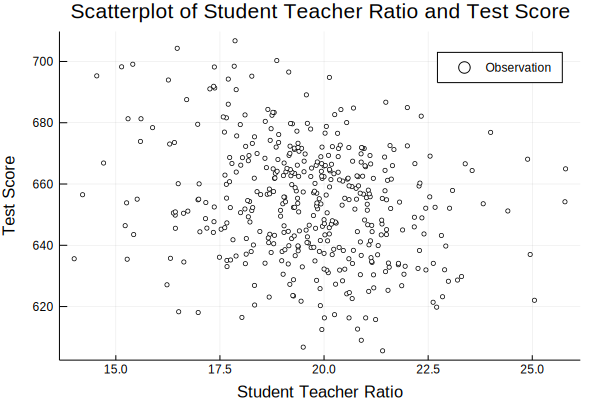

In [3]:
using CSV #we use the CSV package to load the data
using DataFrames #we use the DataFrames package as the data is stored as an object of type "DataFrame"
using Plots #we use the Plots package for generating plots

data = CSV.read("/mnt/juliabox/Econometrics With Julia/Datasets/CASchools.csv") #load the data into the workspace and store it in the variable "data"

data.student_teacher_ratio = data.students ./ data.teachers #add a new column "student_teacher_ratio" to the data, ./ is used to broadcast the division operator between arrays (or in this case, columns)
data.score = (data.read .+ data.math) ./ 2 #add a new column "score" to the data

x = data.student_teacher_ratio
y = data.score

p = plot( #assign a plot object to the variable p1 using the following attributes
    x, #x series
    y, #y series
    st = :scatter, #series type
    title = "Scatterplot of Student Teacher Ratio and Test Score", #plot title
    label = "Observation", #legend label
    xlabel = "Student Teacher Ratio", #x axis label
    ylabel = "Test Score", #y axis label
    ms = 2, #marker size
    mc = :white #marker color
)

- We see that the points are strongly scattered, and that the variables are negatively (but weakly) correlated.
- That is, we expect to observe lower test scores in bigger classes.
- The task we are now facing is to find a line which best fits the data.
- One technique that we can use is ordinary least squares (OLS) estimation.

### The Ordinary Least Squares Estimator

- The OLS estimator chooses the regression coefficients such that the estimated regression line is as “close” as possible to the observed data points.
- Here, closeness is measured by the sum of the squared mistakes made in predicting $Y$ given $X$.
- Let $b_0$ and $b_1$ be some estimators of $β_0$ and $β_1$, then the sum of squared estimation mistakes can be expressed as $\sum^n_{i = 1} (Y_i - b_0 - b_1 X_i)^2$.
- The OLS estimator in the simple regression model is the pair of estimators for intercept and slope which minimizes the expression above.
- Calculus is used to simplify the minimization of such an expression.
- The OLS estimators of the slope $β_1$ and the intercept $β_0$ in the simple linear regression model are:
\begin{align}
  \hat\beta_1 & = \frac{ \sum_{i = 1}^n (X_i - \overline{X})(Y_i - \overline{Y}) } { \sum_{i=1}^n (X_i - \overline{X})^2},  \\
  \\
  \hat\beta_0 & =  \overline{Y} - \hat\beta_1 \overline{X}. 
\end{align}
- The OLS predicted values $\widehat{Y}_i$ and residuals $\hat{u}_i$ are
\begin{align}
  \widehat{Y}_i & =  \hat\beta_0 + \hat\beta_1 X_i,\\
  \\
  \hat{u}_i & =  Y_i - \widehat{Y}_i. 
\end{align}

- Although one could implement the OLS estimator formulas directly, a much easier way of obtaining the regression coefficients would be to use a package which has already implemented linear regression.
- One such package is FixedEffectModels, which requires an additional package FixedEffects as a dependency.

In [1]:
using FixedEffects #FixedEffectModels requires FixedEffects as a dependency
using FixedEffectModels #we use FixedEffectModels to create regression models
using CSV #we use the CSV package to load the data
using DataFrames #we use the DataFrames package as the data is stored as an object of type "DataFrame"
using Plots #we use the Plots package for generating plots

data = CSV.read("/mnt/juliabox/Econometrics With Julia/Datasets/CASchools.csv") #load the data into the workspace and store it in the variable "data"

data.student_teacher_ratio = data.students ./ data.teachers #add a new column "student_teacher_ratio" to the data, ./ is used to broadcast the division operator between arrays (or in this case, columns)
data.score = (data.read .+ data.math) ./ 2 #add a new column "score" to the data

reg_mod = reg( #initialise a FixedEffectModel and define it as reg_mod
                        data, #pass the DataFrame 'data' as the dataset to be used in reg_mod
                        @model(score ~ student_teacher_ratio) #pass the regression formula consisting of the dependent variable 'score' and the exogenous variable 'student_teacher_ratio'
)

                                 Linear Model                                 
Number of obs:                     420   Degrees of freedom:                  2
R2:                              0.051   R2 Adjusted:                     0.049
F Statistic:                   22.5751   p-value:                         0.000
                       Estimate Std.Error  t value Pr(>|t|) Lower 95% Upper 95%
student_teacher_ratio  -2.27981  0.479826 -4.75133    0.000  -3.22298  -1.33664
(Intercept)             698.933   9.46749  73.8245    0.000   680.323   717.543


-------------------------------------------------------------------------------


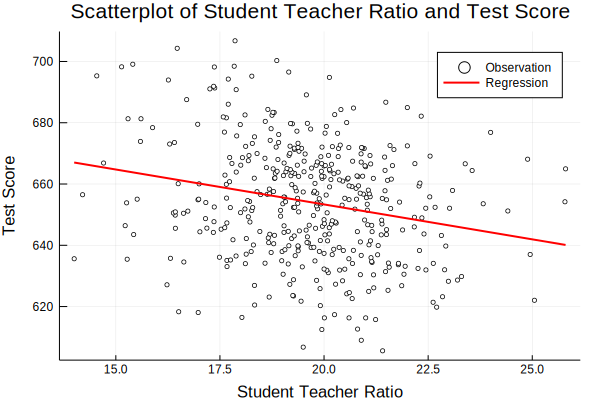

In [2]:
using FixedEffects #FixedEffectModels requires FixedEffects as a dependency
using FixedEffectModels #we use FixedEffectModels to create regression models
using CSV #we use the CSV package to load the data
using DataFrames #we use the DataFrames package as the data is stored as an object of type "DataFrame"
using Plots #we use the Plots package for generating plots

data = CSV.read("/mnt/juliabox/Econometrics With Julia/Datasets/CASchools.csv") #load the data into the workspace and store it in the variable "data"

data.student_teacher_ratio = data.students ./ data.teachers #add a new column "student_teacher_ratio" to the data, ./ is used to broadcast the division operator between arrays (or in this case, columns)
data.score = (data.read .+ data.math) ./ 2 #add a new column "score" to the data

x = data.student_teacher_ratio
y = data.score

p = plot( #assign a plot object to the variable p1 using the following attributes
    x, #x series
    y, #y series
    st = :scatter, #series type
    title = "Scatterplot of Student Teacher Ratio and Test Score", #plot title
    label = "Observation", #legend labels
    xlabel = "Student Teacher Ratio", #x axis label
    ylabel = "Test Score", #y axis label
    ms = 2, #marker size
    mc = :white #marker color
)

reg_mod = reg( #initialise a FixedEffectModel and define it as reg_mod
                        data, #pass the DataFrame 'data' as the dataset to be used in reg_mod
                        @model(score ~ student_teacher_ratio) #pass the regression formula consisting of the dependent variable 'score' and the exogenous variable 'student_teacher_ratio'
)

b0 = reg_mod.coef[1] #the intercept coefficient b0 is retrieved from the regression model object's coef array
b1 = reg_mod.coef[2] #the slope coefficient b1 is retrieved from the regression model object's coef array


x = data.student_teacher_ratio 
y = b0 .+ b1 .* x #the regression equation broadcasts its operators as x is an array

plot!( #overlay the regression line on top of the scatterplot
    p, #plot object to be modified
    x, #x series
    y, #y series
    st = :line, #series type
    label = "Regression", #legend label
    lw = 2, #line width
    lc = :red #line color
)

display(p)